# Temperature prediction using linear regression model
- Importing csv file
- opening the learning data
- fitting the data into a quadratic polynomial
- stores the test data years and temperature
- Finding weights to the model
- Prediction 

In [1]:
import csv
import sys

f_path = 'data/temp/bagalkot_temp.csv'

In [2]:
with open(f_path, 'r') as read_file:
    reader = csv.reader(read_file)
    i = 0
    for row in reader:
        print(row)
        if i == 6:
            break
        i+=1

['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
['1901', '23.035', '23.415', '27.148', '29.37', '27.962', '25.854', '24.267', '24.153', '25.239', '25.384', '23.203', '21.99']
['1902', '22.898', '24.153', '27.87', '29.13', '29.325', '26.665', '25.146', '25.309', '24.501', '25.396', '22.636', '22.397']
['1903', '22.612', '23.671', '26.825', '29.256', '28.457', '26.821', '24.406', '24.313', '24.696', '24.203', '22.25', '21.296']
['1904', '22.12', '23.569', '26.586', '29.041', '28.463', '25.561', '24.271', '24.882', '24.752', '25.087', '22.118', '21.535']
['1905', '21.952', '23.751', '26.264', '27.747', '29.292', '26.875', '24.786', '24.549', '24.702', '25.607', '23.512', '21.456']
['1906', '22.8', '24.035', '26.734', '30.181', '29.816', '25.831', '24.411', '24.451', '23.874', '24.651', '23.641', '22.406']


# Pre-process and building model

228
[22.909 24.149 27.639 28.97  28.6   26.087 24.213 24.594 25.224 25.541
 23.425 21.956 23.237]


C:\Users\ayush\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


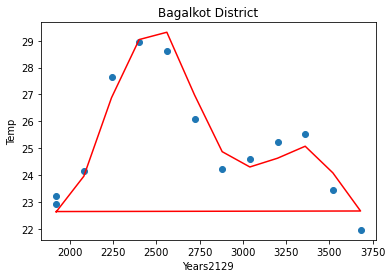



 [-3.63114165e-77  6.56175899e-73 -3.67493424e-69  9.86042308e-67
  4.14649462e-62  2.76900295e-59 -4.75778231e-55 -1.34587899e-51
  3.10199795e-48  2.58110551e-44  2.47956535e-41 -2.88516281e-37
 -1.06416715e-33  1.47968600e-30  1.79607948e-26  1.24131376e-23
 -2.33300580e-19 -3.87058978e-16  3.18172635e-12  3.22895317e-09
 -5.06525858e-05  1.41567761e-01 -1.94247940e+02  1.37773119e+05
 -4.06028238e+07] 


Year	MonthActual Temp	Predicted Temp
[]
1901 1 		 23.035 		 22.213129602372646
1901 2 		 23.415 		 23.594817332923412
1901 3 		 27.148 		 26.520532242953777
1901 4 		 29.37 		 28.78566574305296
1901 5 		 27.962 		 29.481478802859783
1901 6 		 25.854 		 27.449857287108898
1901 7 		 24.267 		 25.122619561851025
1901 8 		 24.153 		 24.323193185031414
1901 9 		 25.239 		 24.507737271487713
1901 10 		 25.384 		 25.06588154286146
1901 11 		 23.203 		 24.393736116588116
1901 12 		 21.99 		 23.000154070556164
1902 1 		 22.898 		 22.245521925389767
1902 2 		 24.153 		 23.612724237143993
1

In [3]:
import csv
from numpy import *
from scipy.interpolate import *
from matplotlib.pyplot import *
from scipy.stats import *
%matplotlib inline
#import math
set_printoptions(threshold= sys.maxsize)
file = open(f_path)# opening the learning data
reader = csv.reader(file)# creating a reader
flag = 0# for avoiding the headers in csv file from including in arrays
dataTemp = array([])# stores the annual Temp data
dataYear = array([])# corresponding year
for i in reader:
    if flag == 0:
        flag = 1
        continue
    else:
        for j in range(1,13):
            if flag == 1:
                startYearOfTestDataTrain = int(i[0])
                flag = 2
            dataYear = append(dataYear,int(i[0])+(int(i[0])*(j-1))/12)#taking years like for jan 1900 + (1900*0)/12 for feb 1900 + (1900*1)/12
            dataTemp = append(dataTemp,float(i[j]))
#print("Data Year","Data Temp")
#for i in range(len(dataYear)):
    #print(dataYear[i],dataTemp[i])
year = (1920 - startYearOfTestDataTrain)*12
print(year)
print(dataTemp[year:year+13])
p1 = polyfit(dataYear,dataTemp,24)# fitting the data into a quadratic polynomial  ----------:::::::::::>>>>>
plot(dataYear[year:year+13],dataTemp[year:year+13],'o')# plotting the actual Temp data on graph as blue dots
plot(dataYear[year:year+13],polyval(p1,dataYear[year:year+13]),'r-')# drawing a curve formed by polynomial
xlabel("Years"+str(year+startYearOfTestDataTrain))
ylabel("Temp")
title("Bagalkot District")
#print(dataYear[year],dataTemp[year],polyval(p1,dataYear[year]),sep = " ")
show()


file.close()

testDataYear = array([])# stores the test data years
testDataTemp = array([])# stores the test data Temp
file = open(f_path)
reader = csv.reader(file)
flag1 = 0
for i in reader:
    if flag1 == 0:
        flag1 = 1
        continue
    for j in range(1,13):
            testDataYear = append(testDataYear,int(i[0])+(int(i[0])*(j-1))/12)
            testDataTemp = append(testDataTemp,float(i[j]))
            if flag1 == 1:
                startYearOfTestData = int(i[0])
                flag1 = 2
#print(startYearOfTestData)
#for i in range(len(testDataYear)):
    #print(testDataYear[i],testDataTemp[i])  ----------:::::::::::>>>>>
#predictedData = p1[0] * testDataYear**3 + p1[1] * testDataYear**2 + p1[2] * testDataYear + p1[3]
#predictedData = p1[0] * testDataYear**4 + p1[1] * testDataYear**3 + p1[2] * testDataYear**2 + p1[3] * testDataYear + p1[4]
#predictedData = p1[0] * testDataYear**5 + p1[1] * testDataYear**4 + p1[2] * testDataYear**3 + p1[3] * testDataYear**2 + p1[4] * testDataYear + p1[5]
#predictedData = p1[0] * testDataYear**6 + p1[1] * testDataYear**5 + p1[2] * testDataYear**4 + p1[3] * testDataYear**3 + p1[4] * testDataYear**2 + p1[5] * testDataYear + p1[6]
#predictedData = p1[0] * testDataYear**7 + p1[1] * testDataYear**6 + p1[2] * testDataYear**5 + p1[3] * testDataYear**4 + p1[4] * testDataYear**3 + p1[5] * testDataYear**2 + p1[6] * testDataYear + p1[7]
#predictedData = p1[0] * testDataYear**8 + p1[1] * testDataYear**7 + p1[2] * testDataYear**6 + p1[3] * testDataYear**5 + p1[4] * testDataYear**4 + p1[5] * testDataYear**3 + p1[6] * testDataYear**2 + p1[7] * testDataYear + p1[8]
#predictedData = p1[0] * testDataYear**9 + p1[1] * testDataYear**8 + p1[2] * testDataYear**7 + p1[3] * testDataYear**6 + p1[4] * testDataYear**5 + p1[5] * testDataYear**4 + p1[6] * testDataYear**3 + p1[7] * testDataYear**2 + p1[8] * testDataYear + p1[9]
#predictedData = p1[0] * testDataYear**10 + p1[1] * testDataYear**9 + p1[2] * testDataYear**8 + p1[3] * testDataYear**7 + p1[4] * testDataYear**6 + p1[5] * testDataYear**5 + p1[6] * testDataYear**4 + p1[7] * testDataYear**3 + p1[8] * testDataYear**2 + p1[9] * testDataYear + p1[10]
#predictedData = p1[0] * testDataYear**11  + p1[1] * testDataYear**10 + p1[2] * testDataYear**9 + p1[3] * testDataYear**8 + p1[4] * testDataYear**7 + p1[5] * testDataYear**6 + p1[6] * testDataYear**5 + p1[7] * testDataYear**4 + p1[8] * testDataYear**3 + p1[9] * testDataYear**2 + p1[10] * testDataYear + p1[11]
#predictedData = p1[0] * testDataYear**14 + p1[1] * testDataYear**13 + p1[2] * testDataYear**12 + p1[3] * testDataYear**11 + p1[4] * testDataYear**10 + p1[5] * testDataYear**9 + p1[6] * testDataYear**8 + p1[7] * testDataYear**7 + p1[8] * testDataYear**6 + p1[9] * testDataYear**5 + p1[10] * testDataYear**4 + p1[11] * testDataYear**3 + p1[12] * testDataYear**2 + p1[13] * testDataYear + p1[14]

predictedData = p1[0] * testDataYear**24 + p1[1] * testDataYear**23 + p1[2] * testDataYear**22 + p1[3] * testDataYear**21 + p1[4] * testDataYear**20 + p1[5] * testDataYear**19 + p1[6] * testDataYear**18 + p1[7] * testDataYear**17 + p1[8] * testDataYear**16 + p1[9] * testDataYear**15 + p1[10] * testDataYear**14 + p1[11] * testDataYear**13 + p1[12] * testDataYear**12 + p1[13] * testDataYear**11 + p1[14] * testDataYear**10 + p1[15] * testDataYear**9 + p1[16] * testDataYear**8 + p1[17] * testDataYear**7 + p1[18] * testDataYear**6 + p1[19] * testDataYear**5 + p1[20] * testDataYear**4 + p1[21] * testDataYear**3 + p1[22] * testDataYear**2 + p1[23] * testDataYear + p1[24]

#predictedData = p1[0] * testDataYear**2 + p1[1] * testDataYear + p1[2]# stores the predicted Temp data
#predictedData = p1[0] * testDataYear**3 + p1[1] * testDataYear**2 + p1[2] * testDataYear + p1[3]
print('\n\n',p1,'\n\n')
print("Year"+"\t"+"Month"+"Actual Temp"+"\t"+"Predicted Temp")

#for i in range(testDataYear.size):
    #print(testDataYear[i],"\t",testDataTemp[i],"\t",predictedData[i])
year = (2002 - startYearOfTestData)*13
temp = startYearOfTestData
i = 0
print(predictedData[year:year+13])
while i < int(testDataTemp.size):
    for j in range(1,13):
        if predictedData[i]<0:
            predictedData[i] = 0
        print(startYearOfTestData,j,"\t\t",testDataTemp[i],"\t\t",predictedData[i])
        i+=1
    startYearOfTestData+=1

#plot(testDataYear[year:year+13],testDataTemp[year:year+13],'r--')# actual curve
#plot(testDataYear[year:year+13],predictedData[year:year+13],"b--")# predicted curve
#xlabel("Years"+str(year+temp))
#ylabel("Temp")
#title("Prototype1")
#show()

#rainfit = p1[0] * dataYear**2 + p1[1] * dataYear + p1[2]
#rainfit = p1[0] * dataYear**3 + p1[1] * dataYear**2 + p1[2] * dataYear + p1[3]
#rainfit = p1[0] * dataYear**4 + p1[1] * dataYear**3 + p1[2] * dataYear**2 + p1[3] * dataYear + p1[4]
#rainfit = p1[0] * dataYear**5 + p1[1] * dataYear**4 + p1[2] * dataYear**3 + p1[3] * dataYear**2 + p1[4] * dataYear + p1[5]
#rainfit = p1[0] * dataYear**6 + p1[1] * dataYear**5 + p1[2] * dataYear**4 + p1[3] * dataYear**3 + p1[4] * dataYear**2 + p1[5] * dataYear + p1[6]
#rainfit = p1[0] * dataYear**7 + p1[1] * dataYear**6 + p1[2] * dataYear**5 + p1[3] * dataYear**4 + p1[4] * dataYear**3 + p1[5] * dataYear**2 + p1[6] * dataYear + p1[7]
#rainfit = p1[0] * dataYear**8 + p1[1] * dataYear**7 + p1[2] * dataYear**6 + p1[3] * dataYear**5 + p1[4] * dataYear**4 + p1[5] * dataYear**3 + p1[6] * dataYear**2 + p1[7] * dataYear + p1[8]
#rainfit = p1[0] * dataYear**9 + p1[1] * dataYear**8 + p1[2] * dataYear**7 + p1[3] * dataYear**6 + p1[4] * dataYear**5 + p1[5] * dataYear**4 + p1[6] * dataYear**3 + p1[7] * dataYear**2 + p1[8] * dataYear + p1[9]
#rainfit = p1[0] * dataYear**10 + p1[1] * dataYear**9 + p1[2] * dataYear**8 + p1[3] * dataYear**7 + p1[4] * dataYear**6 + p1[5] * dataYear**5 + p1[6] * dataYear**4 + p1[7] * dataYear**3 + p1[8] * dataYear**2 + p1[9] * dataYear + p1[10]

#rainfit = p1[0] * dataYear**11 + p1[1] * dataYear**10 + p1[2] * dataYear**9 + p1[3] * dataYear**8 + p1[4] * dataYear**7 + p1[5] * dataYear**6 + p1[6] * dataYear**5 + p1[7] * dataYear**4 + p1[8] * dataYear**3 + p1[9] * dataYear**2 + p1[10] * dataYear + p1[11]

#rainfit = p1[0] * dataYear**14 + p1[1] * dataYear**13 + p1[2] * dataYear**12 + p1[3] * dataYear**11 + p1[4] * dataYear**10 + p1[5] * dataYear**9 + p1[6] * dataYear**8 + p1[7] * dataYear**7 + p1[8] * dataYear**6 + p1[9] * dataYear**5 + p1[10] * dataYear**4 + p1[11] * dataYear**3 + p1[12] * dataYear**2 + p1[13] * dataYear + p1[14]

rainfit = p1[0] * dataYear**24 + p1[1] * dataYear**23 + p1[2] * dataYear**22 + p1[3] * dataYear**21 + p1[4] * dataYear**20 + p1[5] * dataYear**19 + p1[6] * dataYear**18 + p1[7] * dataYear**17 + p1[8] * dataYear**16 + p1[9] * dataYear**15 + p1[10] * dataYear**14 + p1[11] * dataYear**13 + p1[12] * dataYear**12 + p1[13] * dataYear**11 + p1[14] * dataYear**10 + p1[15] * dataYear**9 + p1[16] * dataYear**8 + p1[17] * dataYear**7 + p1[18] * dataYear**6 + p1[19] * dataYear**5 + p1[20] * dataYear**4 + p1[21] * dataYear**3 + p1[22] * dataYear**2 + p1[23] * dataYear + p1[24]


yresid = dataTemp - rainfit
SSresid = sum(pow(yresid,2))
SStotal = len(dataTemp)*var(dataTemp)
rsq = 1- SSresid/SStotal
print("Accuracy :",rsq)
x = 2020+(2020*8)/12
aug2019Temp = p1[0] * x**24 + p1[1] * x**23 + p1[2] * x**22 + p1[3] * x**21 + p1[4] * x**20 + p1[5] * x**19 + p1[6] * x**18 + p1[7] * x**17 + p1[8] * x**16 + p1[9] * x**15 + p1[10] * x**14 + p1[11] * x**13 + p1[12] * x**12 + p1[13] * x**11 + p1[14] * x**10 + p1[15] * x**9 + p1[16] * x**8 + p1[17] * x**7 + p1[18] * x**6 + p1[19] * x**5 + p1[20] * x**4 + p1[21] * x**3 + p1[22] * x**2 + p1[23] * x + p1[24]

print("2019:august : ",aug2019Temp)


## Saving weights of nodes in model

In [4]:
def save_model(array, name):
    np.savetxt(name+".csv", array, delimiter=",")

## Loading saved model to predict Temp.

In [5]:
def load_model(name):
    with open(name+".csv", 'r') as read_file:
        reader = csv.reader(read_file)
        data = []
        for row in reader:
            data.append(row[0])
    read_file.close()
    data = np.asarray(data, dtype=np.float64)
    return data

## Temperature prediction function by passing model name and year for temp prediction

In [6]:
def _predict_temp(model, year):
    total = 0
    for i in range(1,13):
        x = year+(year*i)/12
        eq_sum = 0
        for j in range(0, model.shape[0]):
            eq_sum += (model[j] * (x**(model.shape[0]-j-1)))
        
        if eq_sum < 0:
            eq_sum = 0
        print(eq_sum)
        total += eq_sum
    avrg = total/12
    return avrg

In [7]:
save_model(p1, 'tumkur_temp')

## Model saving for every district in karnataka

In [8]:
model = load_model('tumkur_temp')
model

array([-3.63114165e-77,  6.56175899e-73, -3.67493424e-69,  9.86042308e-67,
        4.14649462e-62,  2.76900295e-59, -4.75778231e-55, -1.34587899e-51,
        3.10199795e-48,  2.58110551e-44,  2.47956535e-41, -2.88516281e-37,
       -1.06416715e-33,  1.47968600e-30,  1.79607948e-26,  1.24131376e-23,
       -2.33300580e-19, -3.87058978e-16,  3.18172635e-12,  3.22895317e-09,
       -5.06525858e-05,  1.41567761e-01, -1.94247940e+02,  1.37773119e+05,
       -4.06028238e+07])

## Predicted values of every month in given year and avg. 

In [10]:
_predict_temp(model, 2019)

25.99795561283827
28.533658795058727
29.52739828079939
27.468672923743725
25.03877966850996
24.305223159492016
24.612999849021435
25.06593769043684
23.960957936942577
22.467816524207592
19.432969979941845
0


23.034364201749366